# Experiments on NME

Import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate as interp
# IMPORT Ole's fixed TMSiSDK python interfacwe- may change
sys.path.insert(0,'C:/Users/warnaarrsp/source/repos/tmsi-python-interface')
from TMSiSDK.file_readers import Poly5Reader
import collections
import math
import copy
sys.path.insert(0, '../ReSurfEMG')
import helper_functions as hf

c:\Users\warnaarrsp\Miniconda3\envs\blank\envs\emgandash\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
c:\Users\warnaarrsp\Miniconda3\envs\blank\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
c:\Users\warnaarrsp\Miniconda3\envs\blank\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


# Reruns should be done from this cell as the start

In [2]:
# Output data - General path to dir for saving .csvs and plots
main_output_dir = '../not_pushed/Output_data/'
if not os.path.exists(main_output_dir):
    os.makedirs(main_output_dir)

In [3]:
y_axis = widgets.Dropdown(
    options=["Samples", "Seconds"],
    value='Seconds',
    description="Select View Option",
    disabled=False,
)
display(y_axis)

Dropdown(description='Select View Option', index=1, options=('Samples', 'Seconds'), value='Seconds')

In [4]:
time_view = y_axis.value
time_view

'Seconds'

<a id='#patient_select'>Input patient file path</a>

In [11]:
# Input data
windows_str = '../not_pushed/topspin_data_anonymized/M001'
root_emg_directory = os.path.join(windows_str)

In [12]:
# do not rerun this cell
big_data_list= []

Now you can pick a file from the list, which have been numbered.

In [13]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)
list_of_numbers_strung = []

for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='5',
    description='Picked File:',
    disabled=False,
)
display(btn)

Dropdown(description='Picked File:', index=5, options=('0', '1', '2', '3', '4', '5', '6', '7', '8'), value='5'…

In [15]:
number_chosen = int(btn.value)
emg_file_chosen = emg_files[number_chosen]
draeger_file_chosen = draeger_files[number_chosen]
print("The files you chose are:\n", emg_file_chosen, '\n', draeger_file_chosen)

The files you chose are:
 ../not_pushed/topspin_data_anonymized/M001\006\EMG_recording.Poly5 
 ../not_pushed/topspin_data_anonymized/M001\006\Draeger_recording.Poly5


In [17]:
# get the poly5 reading
data_emg = Poly5Reader(emg_file_chosen)
data_draeger = Poly5Reader(draeger_file_chosen)
data_emg_samples = data_emg.samples[:data_emg.num_samples]
emg_sample_rate = data_emg.sample_rate
data_draeger_samples = data_draeger.samples[:data_draeger.num_samples]
draeger_sample_rate = data_draeger.sample_rate

# Output data path - Patient specific
patient = emg_files[number_chosen].split('\\')[-3].split('/')[-2]
measurement = emg_files[number_chosen].split('\\')[-2]

if not os.path.exists(main_output_dir + patient + '/'):
    os.makedirs(main_output_dir + patient + '/')

Reading file  ../not_pushed/topspin_data_anonymized/M001\006\EMG_recording.Poly5
	 Number of samples:  762496 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.
Reading file  ../not_pushed/topspin_data_anonymized/M001\006\Draeger_recording.Poly5
	 Number of samples:  37231 
	 Number of channels:  3 
	 Sample rate: 100 Hz
Done reading data.


In [18]:
# x_emg = hf.bad_end_cutter_for_samples(data_emg_samples)
# x_draeger = hf.bad_end_cutter_for_samples(data_draeger_samples)
x_emg = data_emg_samples
x_draeger = data_draeger_samples

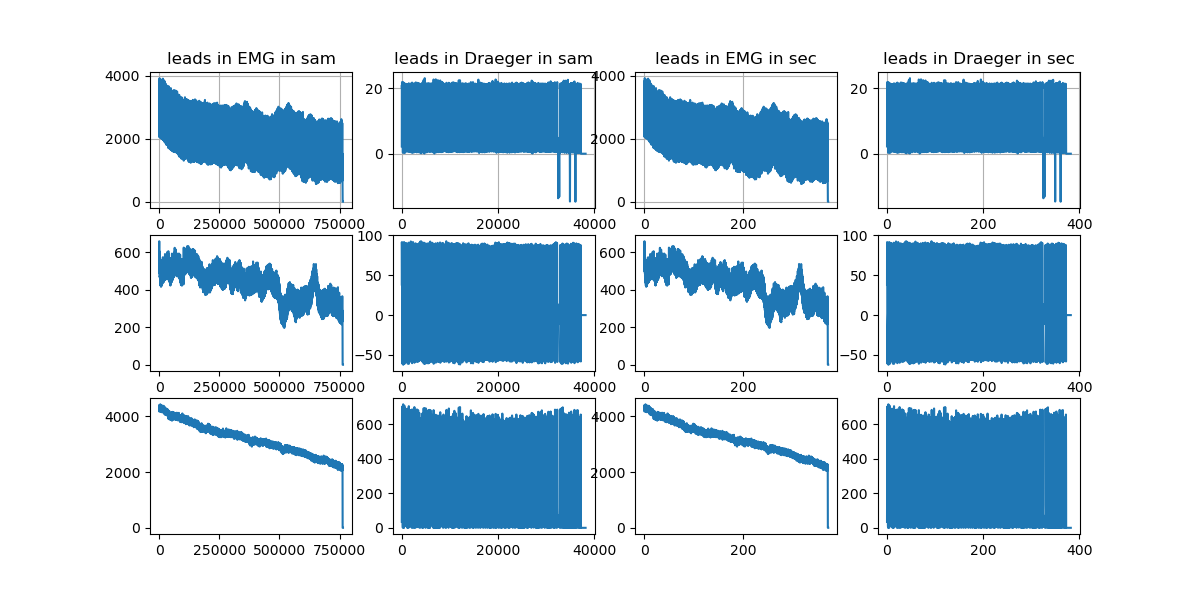

In [19]:


y_emg = [i/emg_sample_rate for i in range(len(x_emg[0,:]))]
y_draeger = [i/draeger_sample_rate for i in range(len(x_draeger[0, :]))]

fig, axis = plt.subplots(nrows=3, ncols=4, figsize=(12, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(x_emg[0])
axis[0, 0].set(title='leads in EMG in sam')
axis[1, 0].plot(x_emg[1])
axis[2, 0].plot(x_emg[2])

axis[0, 1].set(title='leads in Draeger in sam')
axis[0, 1].grid(True)
axis[0, 1].plot(x_draeger[0])
axis[1, 1].plot(x_draeger[1])
axis[2, 1].plot(x_draeger[2])

axis[0, 2].grid(True)
axis[0, 2].plot(y_emg, x_emg[0])
axis[0, 2].set(title='leads in EMG in sec')
axis[1, 2].plot(y_emg, x_emg[1])
axis[2, 2].plot(y_emg, x_emg[2])

axis[0, 3].set(title='leads in Draeger in sec')
axis[0, 3].grid(True)
axis[0, 3].plot(y_draeger, x_draeger[0])
axis[1, 3].plot(y_draeger, x_draeger[1])
axis[2, 3].plot(y_draeger, x_draeger[2])


In [25]:
# type in start time where the occlusions start and press return for it to update
start = input()

In [23]:
# type in end time where the occlusions ends and press return for it to update
end = input()

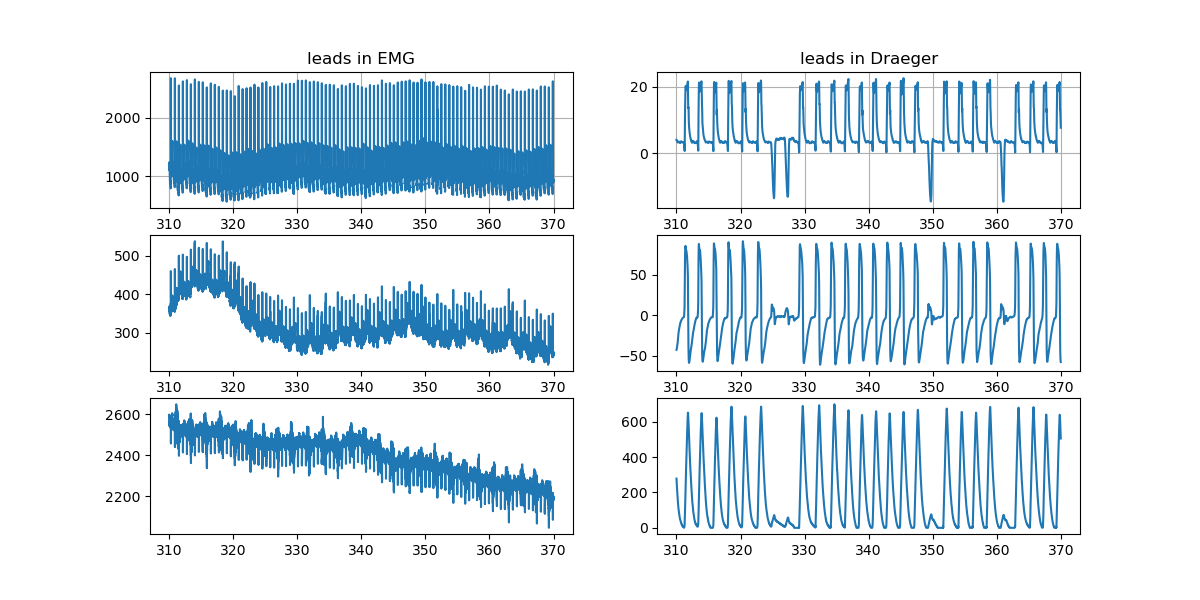

In [26]:
# now examine at the selected window to contain all occlusions

if time_view == 'Seconds':
    start_s = int(float(start)* emg_sample_rate)
    end_s = min([int(float(end)*emg_sample_rate), len(x_emg[0,:])-1])
    start_draeger_s = int(float(start)* draeger_sample_rate)
    end_draeger_s = min([int(float(end)* draeger_sample_rate), len(x_draeger[0,:])-1])

else:
    start_s = int(float(start))
    end_s = min([int(float(end)), len(data_emg_samples[0])-1])
    start_draeger_s = int(float(start)* draeger_sample_rate/emg_sample_rate)
    end_draeger_s = min([int(float(start)* draeger_sample_rate/emg_sample_rate), len(data_draeger_samples[0])-1])
    y_emg = [range(len(data_emg_samples[0]))]
    y_draeger = [range(len(data_draeger_samples[0]))]


fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(y_emg[int(start_s):int(end_s)], x_emg[0][int(start_s):int(end_s)])
axis[0, 0].set(title='leads in EMG')
axis[1, 0].plot(y_emg[int(start_s):int(end_s)], x_emg[1][int(start_s):int(end_s)])
axis[2, 0].plot(y_emg[int(start_s):int(end_s)], x_emg[2][int(start_s):int(end_s)])
axis[0, 1].set(title='leads in Draeger')
axis[0, 1].grid(True)
axis[0, 1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[0][int(start_draeger_s):int(end_draeger_s)])
axis[1, 1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[1][int(start_draeger_s):int(end_draeger_s)])
axis[2, 1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[2][int(start_draeger_s):int(end_draeger_s)])

Happy with your selection? If not redo

# Pre-processing pipeline

In [27]:
# Eliminate the baseline wander from the data
bd_filtered_file_data = hf.emg_bandpass_butter_sample(data_emg_samples, 1, 500, 2048, output='sos')
    
processed_data_emg_di = bd_filtered_file_data[1]
processed_data_emg_para = bd_filtered_file_data[2]

C:\Users\warnaarrsp\AppData\Local\Temp\ipykernel_4736\483505168.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(12, 6))


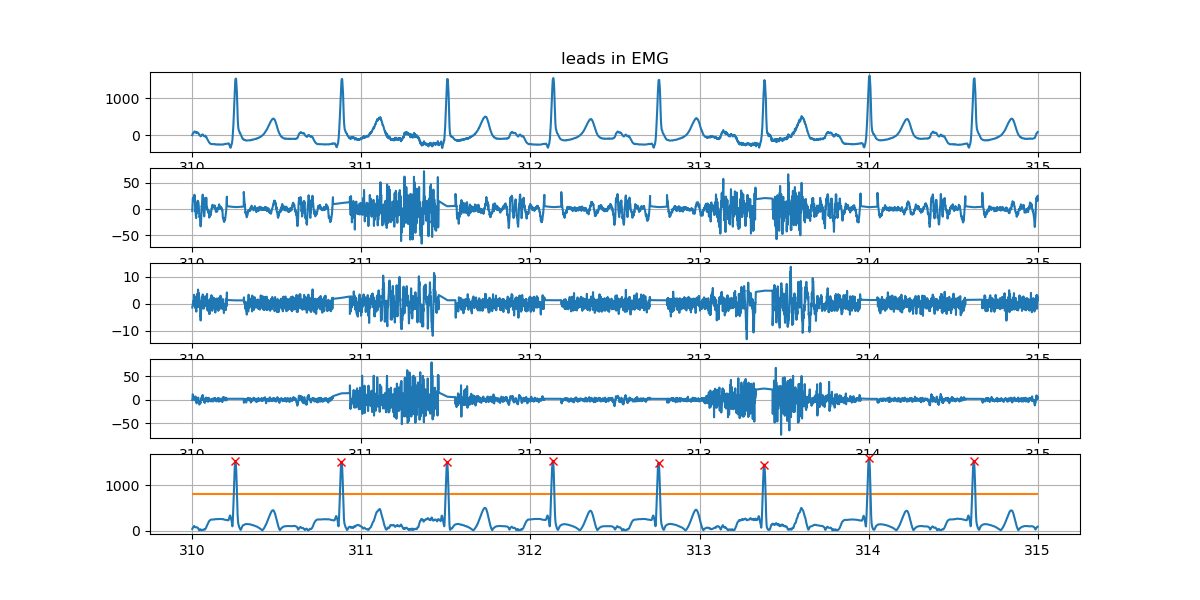

In [54]:
# Apply QRS gating
# Gating settings
plot_window = 5         # Window size to plot the gating results from
peak_fraction = 0.50    # Peak height fraction
ECG_shift = -0           # Shift of gated in samples relative to detected peaks
gate_width = 0.1        # Gate width in seconds

# Detect ECG peaks on 1Hz high-pass filtered signals
peak_width = 0.001
peak_dist = int(emg_sample_rate/3)

ecg = bd_filtered_file_data[0]
ecg_rms = hf.full_rolling_rms(ecg, 10)
peak_height = peak_fraction*(max(ecg_rms[int(start_s):int(start_s+plot_window*emg_sample_rate)]) - min(ecg_rms[int(start_s):int(start_s+plot_window*emg_sample_rate)]))

ECG_peaks, properties  = scipy.signal.find_peaks(ecg_rms, height=peak_height, width=peak_width*emg_sample_rate, distance=peak_dist)
ECG_peaks = ECG_peaks - ECG_shift

# Filter EXG signals 20Hz high pass
ECG_h20 = hf.emg_bandpass_butter_sample(ecg, 20, 500, 2048, output='sos')
emg_di_h20 = hf.emg_bandpass_butter_sample(processed_data_emg_di, 20, 500, 2048, output='sos')
emg_para_h20 = hf.emg_bandpass_butter_sample(processed_data_emg_para, 20, 500, 2048, output='sos')

# Gate ECG and EMG signal
gate_fill_method = 3    # 0: Zeros, 1: Interpolate start-end, 2: Average prior data, 3: Moving average
gate_width_samples = int(gate_width*emg_sample_rate)

gate_samples = list()
for i in range(len(ECG_peaks)):
    for k in range(int(ECG_peaks[i]-gate_width_samples/2),int(ECG_peaks[i]+gate_width_samples/2)):
        gate_samples.append(k)

ECG_gated = hf.gating(ECG_h20, ECG_peaks, gate_width=gate_width_samples, method=3)
emg_di_gated = hf.gating(emg_di_h20, ECG_peaks, gate_width=gate_width_samples, method=3)
emg_para_gated = hf.gating(emg_para_h20, ECG_peaks, gate_width=gate_width_samples, method=3)

# Plot output data --------------------------------

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], bd_filtered_file_data[0, int(start_s):int(start_s+plot_window*2048)])

axis[0].set(title='leads in EMG')
axis[1].grid(True)
axis[1].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], ECG_gated[int(start_s):int(start_s+plot_window*2048)])
axis[2].grid(True)
axis[2].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], emg_di_gated[int(start_s):int(start_s+plot_window*2048)])
axis[3].grid(True)
axis[3].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], emg_para_gated[int(start_s):int(start_s+plot_window*2048)])

axis[4].grid(True)
axis[4].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], ecg_rms[int(start_s):int(start_s+plot_window*2048)])
axis[4].hlines(y=peak_height, xmin=y_emg[int(start_s)], xmax=y_emg[int(start_s+plot_window*2048)], color = "C1")
for idx in range(len(ECG_peaks)):
    if (ECG_peaks[idx] > int(start_s)) & (ECG_peaks[idx] < int(start_s+plot_window*2048)):
        axis[4].plot(y_emg[ECG_peaks[idx]], ecg_rms[ECG_peaks[idx]],'rx')


# Calculate RMS

Text(0, 0.5, 'P_vent (cmH2O)')

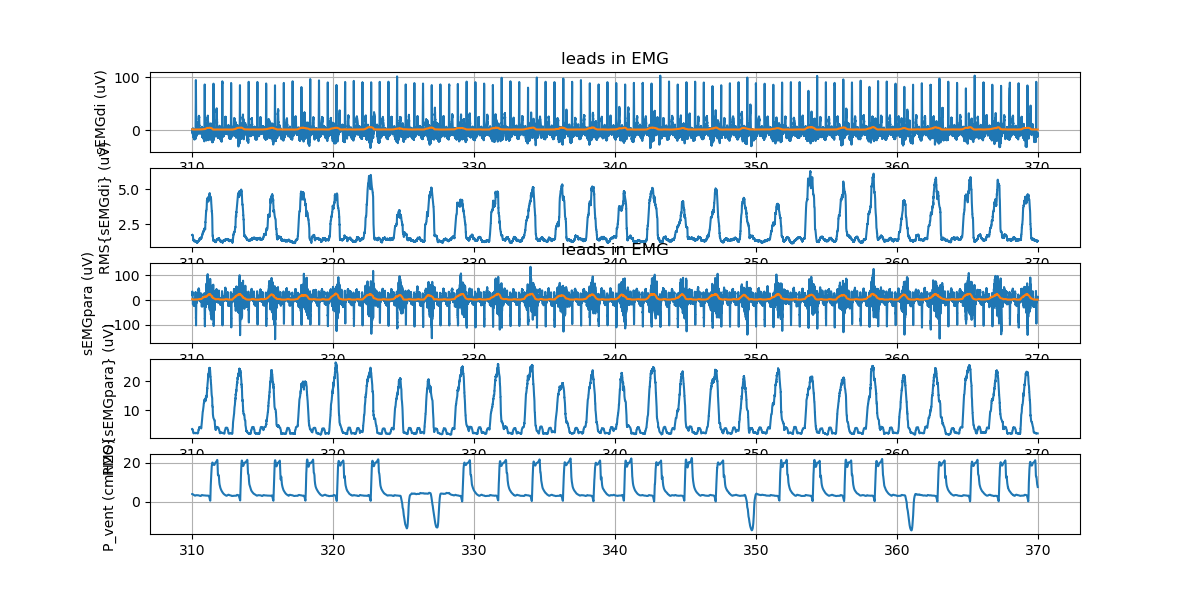

In [55]:
RMS_window_ms = 200
RMS_windows_samp = int(RMS_window_ms / 1000 *  emg_sample_rate)

RMS_data_emg_di = hf.full_rolling_rms(emg_di_gated, RMS_windows_samp)
RMS_data_emg_para = hf.full_rolling_rms(emg_para_gated, RMS_windows_samp)

fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg[int(start_s):int(end_s)], processed_data_emg_di[int(start_s):int(end_s)])
axis[0].plot(y_emg[int(start_s):int(end_s)], RMS_data_emg_di[int(start_s):int(end_s)])
# axis[0].plot(RMS_data_emg[int(start_s):int(end_s)])
axis[0].set(title='leads in EMG')
axis[0].set_ylabel('sEMGdi (uV)')
axis[1].plot(y_emg[int(start_s):int(end_s)], RMS_data_emg_di[int(start_s):int(end_s)])
axis[1].set_xlabel('t (s)')
axis[1].set_ylabel('RMS{sEMGdi} (uV)')

axis[2].grid(True)
axis[2].plot(y_emg[int(start_s):int(end_s)], processed_data_emg_para[int(start_s):int(end_s)])
axis[2].plot(y_emg[int(start_s):int(end_s)], RMS_data_emg_para[int(start_s):int(end_s)])
# axis[2].plot(RMS_data_emg[int(start_s):int(end_s)])
axis[2].set(title='leads in EMG')
axis[2].set_ylabel('sEMGpara (uV)')
axis[3].plot(y_emg[int(start_s):int(end_s)], RMS_data_emg_para[int(start_s):int(end_s)])
axis[3].set_xlabel('t (s)')
axis[3].set_ylabel('RMS{sEMGpara} (uV)')

# axis[1].set(title='leads in Draeger')
axis[4].grid(True)
axis[4].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[0][int(start_draeger_s):int(end_draeger_s)])
axis[4].set_ylabel('P_vent (cmH2O)')



Determine PEEP level

In [56]:
x = x_draeger[2][:int(start_draeger_s)]
V_ee_PKS, _ = scipy.signal.find_peaks(-x)

PEEP_set = np.floor(np.median(x_draeger[0, V_ee_PKS]))


PEEP_set

3.0

In [57]:
# Moving baseline on pressure and all EMG signals for baseline crossing detection

baseline_W_emg = 5 * emg_sample_rate # window length
baseline_W_draeger = 5 * draeger_sample_rate # window length

# emg_di_rolling_base_line = np.percentile(strided_app(RMS_data_emg[int(start_s):int(end_s)], W,1), 33, axis=-1)
emg_di_rolling_base_line = np.zeros((len(RMS_data_emg_di[int(start_s):int(end_s)]),))
emg_para_rolling_base_line = np.zeros((len(RMS_data_emg_para[int(start_s):int(end_s)]),))
P_rolling_base_line = np.zeros((len(x_draeger[0, int(start_draeger_s):int(end_draeger_s)]),))
for idx in range(int(end_s)-int(start_s)):
    emg_di_rolling_base_line[idx] =  np.percentile(RMS_data_emg_di[max([int(start_s), int(start_s)+idx-int(baseline_W_emg/2)]):min([int(end_s), int(start_s)+idx+int(baseline_W_emg/2)])], 33)
    emg_para_rolling_base_line[idx] =  np.percentile(RMS_data_emg_para[max([int(start_s), int(start_s)+idx-int(baseline_W_emg/2)]):min([int(end_s), int(start_s)+idx+int(baseline_W_emg/2)])], 33)

for idx in range(int(end_draeger_s)-int(start_draeger_s)):
    P_rolling_base_line[idx] =  np.percentile(x_draeger[0, max([int(start_draeger_s), int(start_draeger_s)+idx-int(baseline_W_draeger/2)]):min([int(end_draeger_s), int(start_draeger_s)+idx+int(baseline_W_draeger/2)])], 33)


In [58]:
# Detect (negative) occlussion peaks in pressure signal
Pocc_prominence_factor = 0.3

treshold = 0
width = int(0.1 * draeger_sample_rate)
prominence = Pocc_prominence_factor *np.abs( PEEP_set - min(x_draeger[0]))
height = -(PEEP_set - Pocc_prominence_factor *np.abs( PEEP_set - min(x_draeger[0])))
distance = int(0.5 * draeger_sample_rate)

x = x_draeger[0, int(start_draeger_s):int(end_draeger_s)]
P_occ_peaks, properties  = scipy.signal.find_peaks(-x, height=height, prominence=prominence, width=width, distance=distance)
# x = x_draeger[0, int(start_draeger_s):int(end_draeger_s)]

PEEP_crossings_idx = np.argwhere(np.diff(np.sign(x - P_rolling_base_line)) != 0)

P_occ_starts = np.zeros((len(P_occ_peaks),), dtype=int)
P_occ_ends = np.zeros((len(P_occ_peaks),), dtype=int)
for idx in range(len(P_occ_peaks)):
    # a = np.argmin(P_occ_peaks[idx] - np.argwhere(np.diff(np.sign(x[:P_occ_peaks[idx]] - PEEP_set)) != 0))
    a = np.argmin(P_occ_peaks[idx] - np.argwhere(np.diff(np.sign(x[:P_occ_peaks[idx]] - P_rolling_base_line[:P_occ_peaks[idx]])) != 0))
    P_occ_starts[idx] = int(PEEP_crossings_idx[a])
    P_occ_ends[idx] = int(PEEP_crossings_idx[a+1])

P_occ_starts,P_occ_peaks,  P_occ_ends, prominence, height

(array([1475, 1694, 3924, 5058]),
 array([1522, 1737, 3970, 5102], dtype=int64),
 array([1543, 1759, 3994, 5126]),
 5.290110111236572,
 2.2901101112365723)

Get PTPocc

EMG peak identification

In [59]:
# EMG peak detection parameters:
EMG_di_prominence_factor = 0.15         # Threshold peak height as fraction of max peak height 
EMG_para_prominence_factor = 0.15       # Threshold peak height as fraction of max peak height

In [60]:
# Find diaphragmatic EMG peaks

y_di = RMS_data_emg_di[int(start_s):int(end_s)]
treshold = 0
width = int(0.1 * emg_sample_rate)
prominence = EMG_di_prominence_factor*(max(y_di)-np.percentile(y_di[:-emg_sample_rate], 5))
EMG_peaks_di, properties  = scipy.signal.find_peaks(y_di, height=treshold, prominence=prominence, width=width)

draeger_delay = 0.5

# Link EMG peak closest to occlusion pressures
EMG_di_occ_peaks = np.zeros((len(P_occ_peaks),), dtype=int)
PKS_idx = np.zeros((len(P_occ_peaks),), dtype=int)
for idx in range(len(P_occ_peaks)):
    PKS_idx[idx] = np.argmin(np.abs(EMG_peaks_di + draeger_delay * emg_sample_rate - P_occ_peaks[idx]/draeger_sample_rate*emg_sample_rate))

    EMG_di_occ_peaks[idx] = EMG_peaks_di[PKS_idx[idx]]

baseline_crossings_idx = np.argwhere(np.diff(np.sign(y_di - emg_di_rolling_base_line)) != 0)

EMG_di_occ_starts = np.zeros((len(P_occ_peaks),), dtype=int)
EMG_di_occ_ends = np.zeros((len(P_occ_peaks),), dtype=int)
for idx in range(len(P_occ_peaks)):
    a = np.argmin(EMG_di_occ_peaks[idx] - np.argwhere(np.diff(np.sign(y_di[:EMG_di_occ_peaks[idx]] - emg_di_rolling_base_line[:EMG_di_occ_peaks[idx]])) != 0))
    EMG_di_occ_starts[idx] = int(baseline_crossings_idx[a])
    EMG_di_occ_ends[idx] = int(baseline_crossings_idx[a+1])

EMG_di_occ_starts, EMG_di_occ_peaks, EMG_di_occ_ends



(array([ 29177,  33774,  79480, 102594]),
 array([ 30132,  34724,  80150, 103463]),
 array([ 31241,  35631,  81752, 104295]))

In [61]:
# Find parasternal EMG peaks

y_para = RMS_data_emg_para[int(start_s):int(end_s)]
treshold = 0
width = int(0.1 * emg_sample_rate)
prominence = EMG_para_prominence_factor*(max(y_para)-np.percentile(y_para[:-emg_sample_rate], 5))
EMG_peaks_para, properties  = scipy.signal.find_peaks(y_para, height=treshold, prominence=prominence, width=width)

draeger_delay = 0.5

# Link EMG peak closest to occlusion pressures
EMG_para_occ_peaks = np.zeros((len(P_occ_peaks),), dtype=int)
PKS_idx = np.zeros((len(P_occ_peaks),), dtype=int)
for idx in range(len(P_occ_peaks)):
    PKS_idx[idx] = np.argmin(np.abs(EMG_peaks_para + draeger_delay * emg_sample_rate - P_occ_peaks[idx]/draeger_sample_rate*emg_sample_rate))
    EMG_para_occ_peaks[idx] = EMG_peaks_para[PKS_idx[idx]]

baseline_crossings_idx = np.argwhere(np.diff(np.sign(y_para - emg_para_rolling_base_line)) != 0)

EMG_para_occ_starts = np.zeros((len(P_occ_peaks),), dtype=int)
EMG_para_occ_ends = np.zeros((len(P_occ_peaks),), dtype=int)
for idx in range(len(P_occ_peaks)):
    a = np.argmin(EMG_para_occ_peaks[idx] - np.argwhere(np.diff(np.sign(y_para[:EMG_para_occ_peaks[idx]] - emg_para_rolling_base_line[:EMG_para_occ_peaks[idx]])) != 0))
    EMG_para_occ_starts[idx] = int(baseline_crossings_idx[a])
    EMG_para_occ_ends[idx] = int(baseline_crossings_idx[a+1])

EMG_para_occ_starts, EMG_para_occ_peaks, EMG_para_occ_ends

(array([ 28819,  33704,  79410, 102642]),
 array([ 30223,  34338,  80153, 103333]),
 array([ 30708,  35664,  80874, 104326]))

Text(0.5, 0, 't (s)')

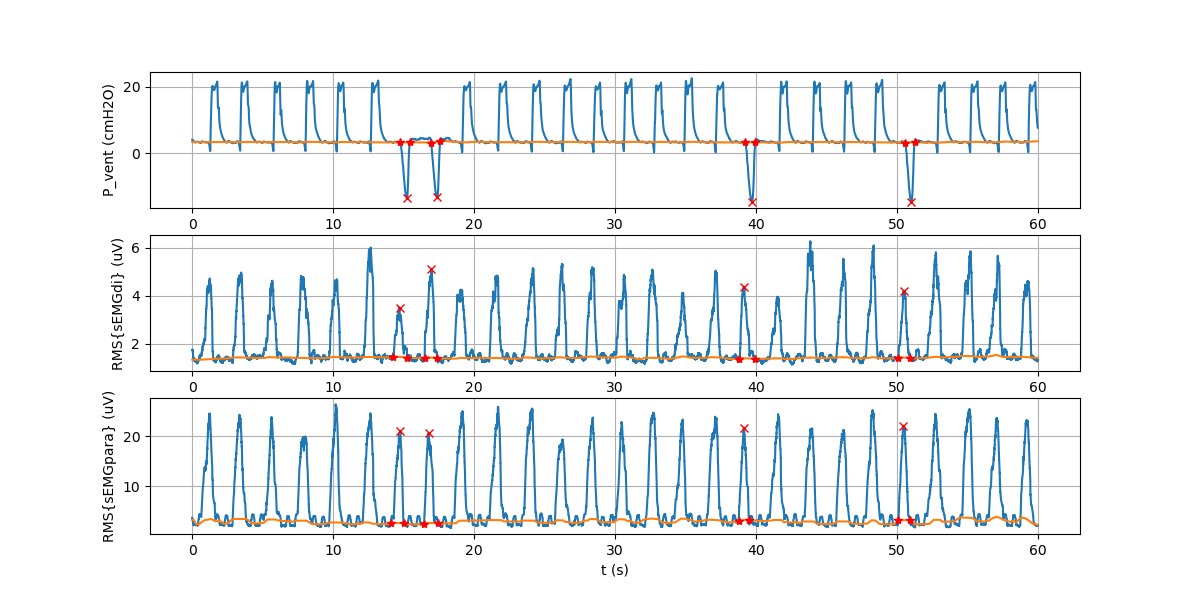

In [62]:
# Plot entire selected time window with indicated peaks

fig_1, axis = plt.subplots(nrows=3, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot([y / draeger_sample_rate for y in range(len(x))], x)
axis[0].plot([y / draeger_sample_rate for y in range(len(x))], P_rolling_base_line)
axis[0].plot(P_occ_peaks/draeger_sample_rate, x[P_occ_peaks], "x", color = "r")
axis[0].plot(P_occ_starts / draeger_sample_rate, P_rolling_base_line[P_occ_starts],'*r')
axis[0].plot(P_occ_ends / draeger_sample_rate, P_rolling_base_line[P_occ_ends],'*r')
# axis[0].vlines(x=P_occ_peaks/draeger_sample_rate, ymin=x[P_occ_peaks], ymax = x[P_occ_peaks]-x[P_occ_peaks]+PEEP_set , color = "C1")
# axis[0].hlines(y=np.tile(PEEP_set,(len(P_occ_peaks),1)), xmin=P_occ_starts/draeger_sample_rate, xmax=P_occ_ends/draeger_sample_rate, color = "C1")
# axis[0].set(title='leads in Draeger')
axis[0].set_ylabel('P_vent (cmH2O)')

# Rolling baseline:
axis[1].grid(True)
axis[1].plot([y / emg_sample_rate for y in range(len(RMS_data_emg_di[int(start_s):int(end_s)]))], RMS_data_emg_di[int(start_s):int(end_s)])
axis[1].plot([y / emg_sample_rate for y in range(len(emg_di_rolling_base_line))], emg_di_rolling_base_line[:int(end_s)-int(start_s)])
axis[1].plot(EMG_di_occ_peaks/emg_sample_rate, y_di[EMG_di_occ_peaks], "x", color = "r")
axis[1].plot(EMG_di_occ_starts / emg_sample_rate, emg_di_rolling_base_line[EMG_di_occ_starts],'*r')
axis[1].plot(EMG_di_occ_ends / emg_sample_rate, emg_di_rolling_base_line[EMG_di_occ_ends],'*r')
axis[1].set_ylabel('RMS{sEMGdi} (uV)')
axis[1].set_xlabel('t (s)')
# axis[1].set_ylim([0, 15])


axis[2].grid(True)
axis[2].plot([y / emg_sample_rate for y in range(len(RMS_data_emg_para[int(start_s):int(end_s)]))], RMS_data_emg_para[int(start_s):int(end_s)])

axis[2].plot(EMG_para_occ_peaks/emg_sample_rate, y_para[EMG_para_occ_peaks], "x", color = "r")

# Rolling baseline:
axis[2].plot([y / emg_sample_rate for y in range(len(emg_para_rolling_base_line))], emg_para_rolling_base_line[:int(end_s)-int(start_s)])
axis[2].plot(EMG_para_occ_starts / emg_sample_rate, emg_para_rolling_base_line[EMG_para_occ_starts],'*r')
axis[2].plot(EMG_para_occ_ends / emg_sample_rate, emg_para_rolling_base_line[EMG_para_occ_ends],'*r')
axis[2].set_ylabel('RMS{sEMGpara} (uV)')
axis[2].set_xlabel('t (s)')
# axis[2].set_ylim([0, 15])


(array([5.97623847, 6.21114018, 7.11027247, 6.63398897]),
 array([0.95166059, 1.63255801, 1.3125836 , 1.06576726]),
 array([9.14648314, 9.03310157, 8.56626481, 9.38533297]),
 array([6.27980033, 3.80454485, 5.41700542, 6.22461321]))

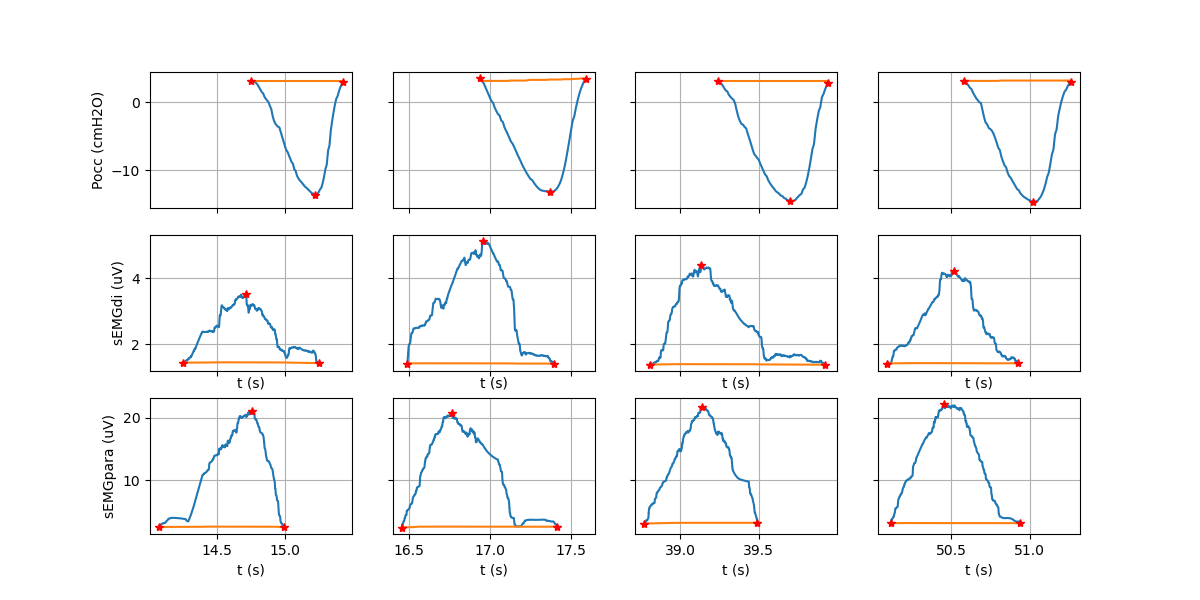

In [63]:
# Subplot per indicated peak
fig_2, axis = plt.subplots(nrows=3, ncols=len(P_occ_peaks), figsize=(12, 6), sharex='col', sharey='row')


PTP_occs = np.zeros((len(P_occ_peaks),))
for idx in range(len(P_occ_peaks)):
    axis[0, idx].grid(True)
    axis[0, idx].plot(y_draeger[P_occ_starts[idx]:P_occ_ends[idx]+1], x[P_occ_starts[idx]:P_occ_ends[idx]+1])
    axis[0, idx].plot(y_draeger[P_occ_starts[idx]:P_occ_ends[idx]+1], P_rolling_base_line[P_occ_starts[idx]:P_occ_ends[idx]+1])

    axis[0, idx].plot(y_draeger[P_occ_peaks[idx]], x[P_occ_peaks[idx]],'*r')
    axis[0, idx].plot(y_draeger[P_occ_starts[idx]], x[P_occ_starts[idx]],'*r')
    axis[0, idx].plot(y_draeger[P_occ_ends[idx]], x[P_occ_ends[idx]],'*r')

    PTP_occs[idx] = np.abs(np.trapz(x[P_occ_starts[idx]:P_occ_ends[idx]+1]-P_rolling_base_line[P_occ_starts[idx]:P_occ_ends[idx]+1], dx=1/draeger_sample_rate))

axis[0, 0].set_ylabel('Pocc (cmH2O)')

ETP_di_occs = np.zeros((len(EMG_di_occ_peaks),))
for idx in range(len(EMG_di_occ_peaks)):
    axis[1, idx].grid(True)
    # axis[1, idx].plot(y_emg[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1], y[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1]- base_frac*min(y))
    axis[1, idx].plot(y_emg[EMG_di_occ_starts[idx]:EMG_di_occ_ends[idx]+1], y_di[EMG_di_occ_starts[idx]:EMG_di_occ_ends[idx]+1])
    
    axis[1, idx].plot(y_emg[EMG_di_occ_starts[idx]:EMG_di_occ_ends[idx]+1], emg_di_rolling_base_line[EMG_di_occ_starts[idx]:EMG_di_occ_ends[idx]+1])

    axis[1, idx].plot(y_emg[EMG_di_occ_peaks[idx]], y_di[EMG_di_occ_peaks[idx]],'*r')
    axis[1, idx].plot(y_emg[EMG_di_occ_starts[idx]], y_di[EMG_di_occ_starts[idx]],'*r')
    axis[1, idx].plot(y_emg[EMG_di_occ_ends[idx]], y_di[EMG_di_occ_ends[idx]],'*r')
    ETP_di_occs[idx] = np.trapz(y_di[EMG_di_occ_starts[idx]:EMG_di_occ_ends[idx]+1] - emg_di_rolling_base_line[EMG_di_occ_starts[idx]:EMG_di_occ_ends[idx]+1], dx=1/emg_sample_rate)

    axis[1, idx].set_xlabel('t (s)')

axis[1, 0].set_ylabel('sEMGdi (uV)')

ETP_para_occs = np.zeros((len(EMG_para_occ_peaks),))
for idx in range(len(EMG_para_occ_peaks)):
    axis[2, idx].grid(True)
    # axis[1, idx].plot(y_emg[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1], y[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1]- base_frac*min(y))
    axis[2, idx].plot(y_emg[EMG_para_occ_starts[idx]:EMG_para_occ_ends[idx]+1], y_para[EMG_para_occ_starts[idx]:EMG_para_occ_ends[idx]+1])
    
    axis[2, idx].plot(y_emg[EMG_para_occ_starts[idx]:EMG_para_occ_ends[idx]+1], emg_para_rolling_base_line[EMG_para_occ_starts[idx]:EMG_para_occ_ends[idx]+1])

    axis[2, idx].plot(y_emg[EMG_para_occ_peaks[idx]], y_para[EMG_para_occ_peaks[idx]],'*r')
    axis[2, idx].plot(y_emg[EMG_para_occ_starts[idx]], y_para[EMG_para_occ_starts[idx]],'*r')
    axis[2, idx].plot(y_emg[EMG_para_occ_ends[idx]], y_para[EMG_para_occ_ends[idx]],'*r')
    ETP_para_occs[idx] = np.trapz(y_para[EMG_para_occ_starts[idx]:EMG_para_occ_ends[idx]+1] - emg_di_rolling_base_line[EMG_para_occ_starts[idx]:EMG_para_occ_ends[idx]+1], dx=1/emg_sample_rate)

    axis[2, idx].set_xlabel('t (s)')

axis[2, 0].set_ylabel('sEMGpara (uV)')


# Calculated neuromuscular efficiency: NME = PTP / ETP_di
NME_di = np.abs(PTP_occs)/ETP_di_occs

PTP_occs, ETP_di_occs, ETP_para_occs, NME_di

Store values for later analysis

In [64]:
fig_1.savefig(main_output_dir + patient + '/' + patient + '_'+ measurement + '_timeplots_'+str(int(gate_width*1000))+'.png', dpi=300)
fig_2.savefig(main_output_dir + patient + '/' + patient + '_'+ measurement + '_snapshots_'+str(int(gate_width*1000))+'.png', dpi=300)

for idx in range(len(PTP_occs)):
    data_now = [patient, measurement, PEEP_set, PTP_occs[idx], ETP_di_occs[idx], NME_di[idx], ETP_para_occs[idx]]
    big_data_list.append(data_now)
    

patient, measurement

('topspin_data_anonymized', '006')

In [65]:
big_data_list

[['topspin_data_anonymized',
  '006',
  3.0,
  5.976238465122879,
  3.7221586874424046,
  1.605584008356536,
  10.13021306053453],
 ['topspin_data_anonymized',
  '006',
  3.0,
  6.211140177804232,
  2.3743736036515406,
  2.615906851496387,
  10.196506295437224],
 ['topspin_data_anonymized',
  '006',
  3.0,
  7.110272469222546,
  2.6317143578834816,
  2.701764516321171,
  11.972291940820167],
 ['topspin_data_anonymized',
  '006',
  3.0,
  6.6339889724627135,
  1.994189441767579,
  3.3266593601972843,
  9.3852941752455],
 ['topspin_data_anonymized',
  '006',
  3.0,
  5.976238465122879,
  0.9516605860608229,
  6.279800332868806,
  9.146483138146815],
 ['topspin_data_anonymized',
  '006',
  3.0,
  6.211140177804232,
  1.6325580122302057,
  3.804544850029136,
  9.033101570607315],
 ['topspin_data_anonymized',
  '006',
  3.0,
  7.110272469222546,
  1.3125835991081605,
  5.417005418971901,
  8.566264808592347],
 ['topspin_data_anonymized',
  '006',
  3.0,
  6.6339889724627135,
  1.06576726142

In [66]:
columns_now = ['patient', 'measurement', 'PEEP_set', 'PTP_occs', 'ETP_di_occs', 'NME_di', 'ETP_para_occs'
              ]
df = pd.DataFrame(big_data_list, columns= columns_now)
df

,patient,measurement,PEEP_set,PTP_occs,ETP_di_occs,NME_di,ETP_para_occs
0,topspin_data_anonymized,006,3.0,5.976238,3.722159,1.605584,10.130213
1,topspin_data_anonymized,006,3.0,6.211140,2.374374,2.615907,10.196506
2,topspin_data_anonymized,006,3.0,7.110272,2.631714,2.701765,11.972292
3,topspin_data_anonymized,006,3.0,6.633989,1.994189,3.326659,9.385294
4,topspin_data_anonymized,006,3.0,5.976238,0.951661,6.279800,9.146483
5,topspin_data_anonymized,006,3.0,6.211140,1.632558,3.804545,9.033102
6,topspin_data_anonymized,006,3.0,7.110272,1.312584,5.417005,8.566265
7,topspin_data_anonymized,006,3.0,6.633989,1.065767,6.224613,9.385333


Text(0.5, 1.0, '')

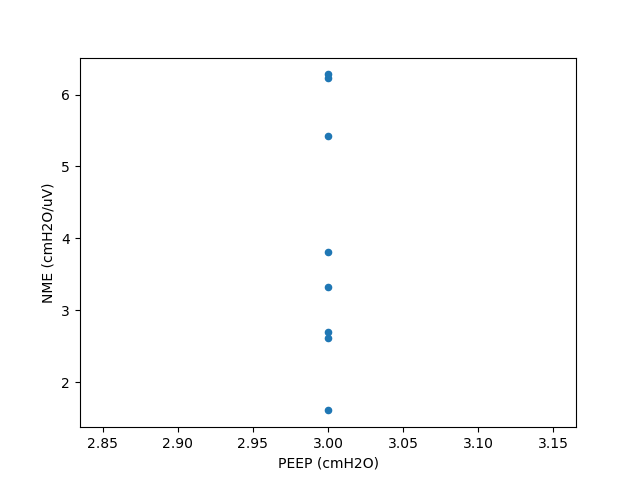

In [67]:
# bp = df.boxplot(column='NME_di', by='PEEP_set')
bp = df.plot.scatter('PEEP_set','NME_di')
bp.set_ylabel('NME (cmH2O/uV)')
bp.set_xlabel('PEEP (cmH2O)')
bp.set_title('')


In [68]:
df.to_csv(main_output_dir + patient + '/' + patient + '_my_saved_NME_experiments_gate_'+str(int(gate_width*1000))+'.csv')
# bp.figure.savefig(main_output_dir + patient + '/' + patient + '_'+str(int(gate_width*1000))+'_boxplot.png', dpi=300)
bp.figure.savefig(main_output_dir + patient + '/' + patient + '_'+str(int(gate_width*1000))+'_scatter.png', dpi=300)